In [1]:
!pip install text_hammer
!pip install nltk
!pip install text_hammer
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 43.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 22.4 MB/s 
     |████████████████████████████████| 6.6 MB 9.7 MB/s 
     |████████████████████████████████| 163 kB 7.0 MB/s 


In [2]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn
from sklearn.utils import shuffle 
from sklearn.metrics import classification_report 

from tqdm._tqdm_notebook import tqdm_notebook 
tqdm_notebook.pandas()
from tensorflow.keras.utils import to_categorical
from transformers import AutoTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.initializers import TruncatedNormal 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf 


import nltk
nltk.download('punkt')
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from string import punctuation
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from google.colab import drive
import text_hammer as th
drive.mount('/content/drive')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Cleaning And Exploration

In [ ]:
path = "/content/drive/MyDrive/My Folders/NLP_Research/Mental-health-related-subreddits.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Title,Text,Subreddit
0,exposure does not work!,I have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,"Back in March (I know, a while ago D:), I woke...",Anxiety
2,How long can a panic attack last?!,I've been withdrawing from medicines lately (e...,Anxiety
3,Stepping stones,"First time poster, long time lurker. \n\nI've ...",Anxiety
4,"Coping with anxiety over climate change, on th...","Hi all,\n\nI made a throwaway account as my ma...",Anxiety


In [ ]:
df.iloc[0][1]

"I have struggled with social anxiety from childhood and the main advice from friends, self-help books and professionals is to expose myself to those environments but I'm not better off!\n\nExample: I get anxious every single time I go into a shop even though I have been doing my own shopping daily/ weekly since being 16.\n\nI get nervous, sweaty, heart pounding every time I go into the gym, yet I have been working out at the same gym for years.\n\nHas exposure not worked for anyone else?"

In [ ]:

tqdm_notebook.pandas()

def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_cleaned = text_preprocessing(df,'Text')
df_cleaned.head()
df_cleaned.iloc[0][1]

  0%|          | 0/488472 [00:00<?, ?it/s]

  0%|          | 0/488472 [00:00<?, ?it/s]

  0%|          | 0/488472 [00:00<?, ?it/s]

  0%|          | 0/488472 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:333: MarkupResemblesLocatorWarning: ".." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:333: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "https://www.psychologytoday.com/blog/anxiety-zen/201405/22-quick-tips-change-your-anxiety-forever" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:421: MarkupResemblesLocatorWarning: "https://imgur

  0%|          | 0/488472 [00:00<?, ?it/s]

  0%|          | 0/488472 [00:00<?, ?it/s]

'i have struggled with social anxiety from childhood and the main advice from friends selfhelp books and professionals is to expose myself to those environments but i am not better offexample i get anxious every single time i go into a shop even though i have been doing my own shopping daily weekly since being 16i get nervous sweaty heart pounding every time i go into the gym yet i have been working out at the same gym for yearshas exposure not worked for anyone else'

In [ ]:
df.head(20)

,Title,Text,Subreddit
0,exposure does not work!,i have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,back in march i know a while ago d i woke up t...,Anxiety
2,How long can a panic attack last?!,i have been withdrawing from medicines lately ...,Anxiety
3,Stepping stones,first time poster long time lurker i have had ...,Anxiety
4,"Coping with anxiety over climate change, on th...",hi alli made a throwaway account as my main ac...,Anxiety
5,I don't even know what I'm looking for by post...,i have been having anxiety problems of some ki...,Anxiety
6,"Literally numb, not sure what to do.",i am 21 f not even sure if this is right place...,Anxiety
7,Lifetime anxiety,47mi have been anxious for as long as i can re...,Anxiety
8,went and saw the fireworks alone and finally f...,happy new year to everyone from australia i ha...,Anxiety
9,Social anxiety help for NYE - I don't know anyone,hi ranxiety i am invited to a new year eve par...,Anxiety


In [ ]:
from google.colab import files

df_cleaned.to_csv('df.csv')
files.download('df.csv')

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/My Folders/NLP_Research/Mental-health-related-subreddits-cleaned.csv')

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/My Folders/NLP_Research/Mental-health-related-subreddits-cleaned.csv"
df = pd.read_csv(path)
df = df[['Title','Text','Subreddit']]
df.head()

,Title,Text,Subreddit
0,exposure does not work!,i have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,back in march i know a while ago d i woke up t...,Anxiety
2,How long can a panic attack last?!,i have been withdrawing from medicines lately ...,Anxiety
3,Stepping stones,first time poster long time lurker i have had ...,Anxiety
4,"Coping with anxiety over climate change, on th...",hi alli made a throwaway account as my main ac...,Anxiety


In [ ]:
df.iloc[0][1]

'i have struggled with social anxiety from childhood and the main advice from friends selfhelp books and professionals is to expose myself to those environments but i am not better offexample i get anxious every single time i go into a shop even though i have been doing my own shopping daily weekly since being 16i get nervous sweaty heart pounding every time i go into the gym yet i have been working out at the same gym for yearshas exposure not worked for anyone else'

In [ ]:
df.shape[0]

488472

In [ ]:
df[['Text','Subreddit']].groupby('Subreddit').count()

,Text
Subreddit,
Anxiety,86200
BPD,38177
autism,7135
bipolar,41459
depression,258322
mentalhealth,39355
schizophrenia,17488


In [ ]:
df.describe().T

,count,unique,top,freq
Title,488468,442580,Help,457
Text,488139,483105,mega thread here we discuss embarrassing stori...,103
Subreddit,488469,7,depression,258496


In [ ]:
df = df.drop_duplicates(keep = 'last')
df.describe().T

,count,unique,top,freq
Title,487437,442580,Help,456
Text,487108,483105,removed,81
Subreddit,487438,7,depression,258194


In [ ]:
df.isnull().sum()

Title          4
Text         333
Subreddit      3
dtype: int64

In [ ]:
bool_series = pd.isnull(df["Title"])
df[bool_series] 

,Title,Text,Subreddit
228051,NaN,anyone have an answer to this i have been aski...,NaN
229087,NaN,i am slowly being worn down to nothing i used ...,depression
437117,NaN,not too much available online regarding this a...,NaN
441637,NaN,heat wave and have not slept more than 4ish ho...,NaN


In [ ]:
bool_series = pd.isnull(df["Text"])
df[bool_series] 

,Title,Text,Subreddit
6156,It was supposed to be fun and I ruined it.,NaN,Anxiety
6272,Overly-worried about everything. advice?,NaN,Anxiety
6971,TFW health anxiety makes it so you don't want ...,NaN,Anxiety
7108,I have a thing for large toilet areas like 10 ...,NaN,Anxiety
9359,I think I'm having a nervous breakdown but no ...,NaN,Anxiety
...,...,...,...
486169,I hurt people,NaN,schizophrenia
487623,not dick,NaN,schizophrenia
487624,i wanted my visualisations or hallucinations a...,NaN,schizophrenia
488268,"sifls deux, ma tb(keyboard)",NaN,schizophrenia


In [ ]:
df = df.dropna()
df.isnull().sum()
df[['Text','Subreddit']].groupby('Subreddit').count()

,Text
Subreddit,
Anxiety,86080
BPD,38120
autism,7129
bipolar,41023
depression,258019
mentalhealth,39261
schizophrenia,17472


In [ ]:
print(df.shape[0])

487104


In [ ]:
mental_health_df = df[df['Subreddit'] == 'mentalhealth']
depression_df = df[df['Subreddit'] == 'depression']

In [ ]:
for i in range(0,10):
    print(mental_health_df.iloc[i][1])

just as the title says are people with psychotic disorders able to plan ahead for the future or is the break in reality too large an obstacle to do that thank you
hi therei would like to get the word out about an event i am holding tomorrow at 10am mst i will be going live on facebook to start a discussion about the mental health crisis in our military i would like to extend an open invitation to you to stop by and let your voice be heard just search for the mental marine on facebook and you will find me thanks
not sure if i have either but man i need to go in i do not want the stigma attached to it but i feel just deteriorating my sister has mental health issues not otherwise specified she had schizophrenia behavior as well as bipolar behavior i am in no way like that but i do not know it seems like a waste because they say you have mental health issues but can not actually fix it
hi everyone i wanted to share a blog that i have started writing it has been very helpful for me to work 

In [ ]:
for i in range(0,10):
    print(depression_df.iloc[i][1])

in the end we all die nothing we do means anything so why do we do anything throught life we endure bullshit and experience good times but the shitness is constant it never leaves sometimes i would rather not exist or atleast have a purpose a drive to live for i always feel numb there are brief moments were i can have good times but it takes all my being to maintiain i sit here wondering if there will be any true enjoyment in life from what im surrounded by the drivel of normal life is that what my fate is a life of mundane bullshit of pointless relationships of sitting around doing nothing at all and even when something good comes along eventually it leaves that is the duality of life misery and happiness both ever flowing rivers which is not a bad thing if it were not for the fact that the good times seem to feel empty still in the end there is still no reason no purpose we exist just waiting for the day we diein all things i thought had meaning things that i thought i had pleasure i

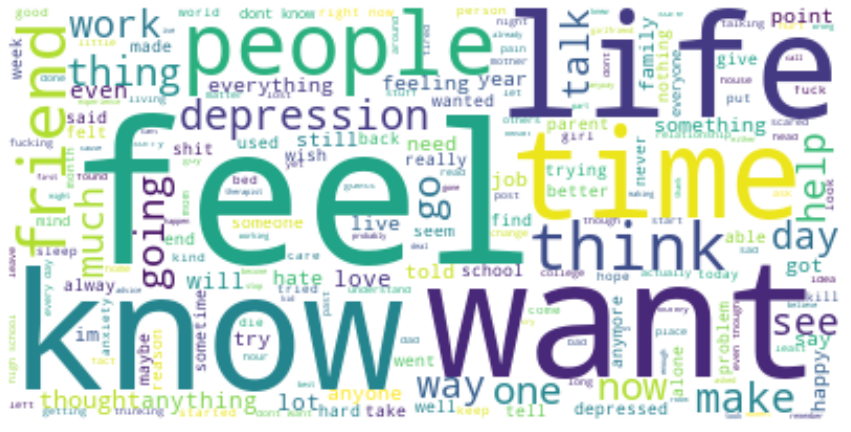

In [ ]:
text = " ".join(i for i in depression_df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
counter = df.copy()
counter['number_of_words'] = counter.Text.apply(lambda x: len(x.split()))
counter = counter.sort_values(by = 'number_of_words',ascending = True)
counter.head(30)

,Title,Text,Subreddit,number_of_words
314208,"Sorry, I Am In Pain",...,depression,0
33471,fuck morning anxiety!!!!!!!,arghhhhhh,Anxiety,1
166806,"""Atleast I'm safe inside my mind""",ha,depression,1
124834,Am I being neglected by my mom?,deleted,depression,1
357871,Can Artificial Intelligence Detect Depression ...,httpswwwsmithsonianmagcominnovationcanartifici...,depression,1
395236,Mental health aide/transitions,httpwwwreintegrationcomresources,mentalhealth,1
315989,I want to die,removed,depression,1
301022,My brain feels like that episode of SpongeBob ...,httpsyoutube5qxd5fhgipq,depression,1
315975,Ive drew something :D,httpsimgurcomafyjrxmh,depression,1
395612,"Second opinion, looking for advice",and,mentalhealth,1


In [ ]:
counter[['Text','number_of_words']].groupby('number_of_words').count()

,Text
number_of_words,
0,1
1,1659
2,615
3,864
4,1044
...,...
7076,1
7425,1
7447,1


In [ ]:
t = counter[counter['number_of_words'] == 6]
t
for i in range(t.shape[0]):
    print(t.iloc[i][1])

with every fiber of my being
what do you do about it
i even completed a project httpsimgurcomgalleryxs3mjoc
mods lmk if this isnt allowed
it brought me so much joy
who elses has headphones on 289
go here httpslistenonrepeatcomhttpslistenonrepeatcomvy3imms8glgyikesgotta love some kanye
i hope i am not pregnant
i simply gave up on everything
anyone else perfectionism is killing me
seriously who i am is ugly
how do i explain to them
i feel so useless and drained
now all i need are friends
sometimes for absolutely no reason whatsoever
i missed this feeling so much
and it is driving me crazy
i think i love being depressed
i think im done being crazy
any advice would be greatly appreciated
should i act like im dreaming
i just someone to talk to
what caused you to be depressed
keep fighting we can do this
visit their website for more information
and it just makes everything worse
i just feel alone and bored
its literally like night and day
whats going well for you lately
anybody else have the

In [ ]:
t = counter[counter['number_of_words'] == 7907]
t
for i in range(t.shape[0]):
    print(t.iloc[i][1])

this is going to be a long post but it is also gonna be my life summed up into one story 5000 words or less i hope but i am tired of telling no onetoday i messaged one of my good friends my best friends girlfriend i hooked them up and it is something i am extremely proud of they are a year strong and she told me that i was acting differently lately i want to be a bounty hunter already starting the process of enrolling into a course and i am doing unsafe things speeding not caring about the law drinking all the time with seemingly no drive to do anything my attempt that forced me into the hospital and it is built up over the past year i am 18 all my friends are going to college or working and i just sit here on my ass with the insurance money i get from my dads death i went out and bought a dodge charger an 08 then about a month and a half later decided i wanted a gsxr600 a super sport bike and i bought that too it is all i got to my name and i love them both but it is something i never

In [ ]:
filter = df['Text'].str.contains('http')

In [ ]:
filter = df['Text'].str.contains('http')
df.shape[0]

487104

In [ ]:
df_cleaned = counter.copy()
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=0]
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=1]
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=2]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('http')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('jpg')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('png')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('www')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('img')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('gif')==False]
df_cleaned.shape[0]

471513

In [ ]:
df_cleaned

,Title,Text,Subreddit,number_of_words
217482,The feeling when you'd like to hang out with f...,i am lonely,depression,3
244537,Please someone do me a huge favor,end my life,depression,3
446105,Has anyone watched captain Fantastic?,captain fantastic sorry,bipolar,3
136169,Gambling.,ruining my life,depression,3
23420,anxiety causing chest pain?,is this normal,Anxiety,3
...,...,...,...,...
351270,My Spiral Into Madness,my mother is the only person i have ever known...,depression,7076
175374,Autistic and Loved! Meeting your bully years l...,warning its pretty long in this story apple re...,depression,7425
181385,Do I have any reason to live?,all stories have a beginning and an end whethe...,depression,7447
102625,Reciprocal Suffering,if you have the time please either read this e...,BPD,7550


In [ ]:
t = df_cleaned[df_cleaned['number_of_words'] == 3]
t
for i in range(t.shape[0]):
    print(t.iloc[i][1])

i am lonely
end my life
captain fantastic sorry
ruining my life
is this normal
if so how
were all alone
fuck the world
somebody help me
is not he
and calm me
whats the point
the what ifs
whos to say
thoughts experiences recommendations
days flyi cry
laughing out loud
maybe another day
i am sad
according to rshowerthoughts
i am 31
beer time sdg
it is hopeless
fuck this shit
i need help
to be happy
please help me
just a thought
such is life
i just cannot
is it true
anyone tried it
in a nutshell
i feel awful
pretty self explanatory
just asking tentative
somebody help me
that is all
i cannot decide
everybody hates me
here we go
i love therapy
sorry its late
by your definition
that is all
just venting sorry
that is all
i hate myself
i have nobody
anyone can relate
has anyone been
prime minister me
fuck this shit
i am pathetic
useless as fuck
i hate myselfx200bhelp
its great really
post your projects
that is it
plz end it
i give up
god gods men
fuck being broke
am i right
i feel terrible
loo

In [ ]:
!pip install CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement CountVectorizer (from versions: none)
ERROR: No matching distribution found for CountVectorizer


In [ ]:
def tokenization(string):
    words=nltk.word_tokenize(string)
    return ' '.join(words)

def removestopwords(string):
    for i in punctuation:
        string=string.replace(i,'')
    words=nltk.word_tokenize(string)
    k=[]
    eng_stop=stopwords.words('english')
    for each in words:
        if each not in eng_stop:
            k.append(each.lower())
    return ' '.join(k)

def stem(string):
    words = nltk.word_tokenize(string)
    ps = PorterStemmer()
    l = []
    for each in words:
        l.append(ps.stem(each))
    return ' '.join(l)

def lemmat(string):
    words=nltk.word_tokenize(string)
    ws=WordNetLemmatizer()
    l=[]
    for each in words:
        l.append(ws.lemmatize(each))
    return ' '.join(l)

def Refine(string):
    return stem(removestopwords(tokenization(string)))

In [ ]:
refineddataframe = df_cleaned.copy()
refineddataframe['Text']=df_cleaned['Text'].apply(lambda x: Refine(x))
refineddataframe.head()

KeyboardInterrupt: ignored

In [ ]:
text = " ".join(i for i in depression_df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_grouped=refineddataframe[['Text','Subreddit']].groupby(by='Subreddit').agg(lambda x:' '.join(x))
df_grouped.head()

,Text
Subreddit,
Anxiety,is this normal and calm me please help me prim...
BPD,thoughts experiences recommendations in a nuts...
autism,is it true its great really put them down i am...
bipolar,captain fantastic sorry somebody help me whos ...
depression,i am lonely end my life ruining my life if so ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['Text'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,0000000000000,0000000000000000000001,00000000001,0000000001,000000001,00000000137,000000007,...,zzt,zztdroning,zztone,zzzquil,zzzquill,zzzyquil,zzzz,zzzzz,zzzzzzzz,zzzzzzzzzz
Subreddit,,,,,,,,,,,,,,,,,,,,,
Anxiety,3,3,2,0,0,0,1,0,0,0,...,0,0,0,16,0,0,2,0,0,0
BPD,1,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
autism,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


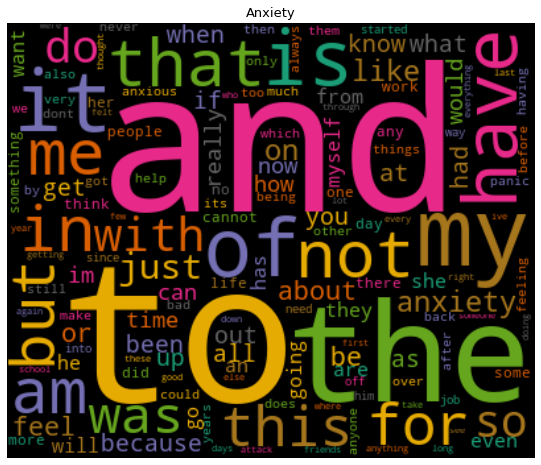

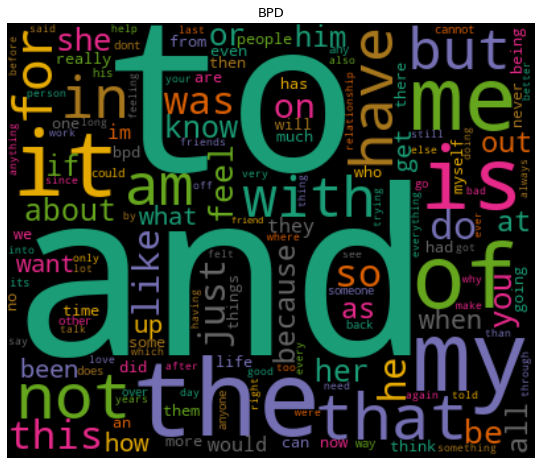

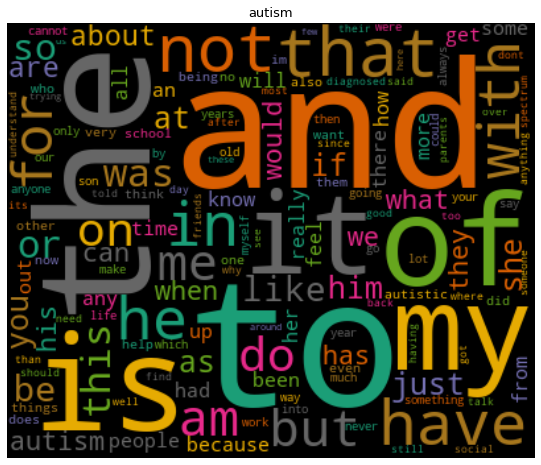

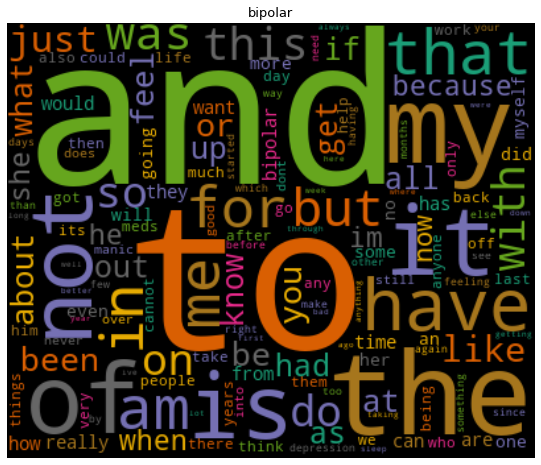

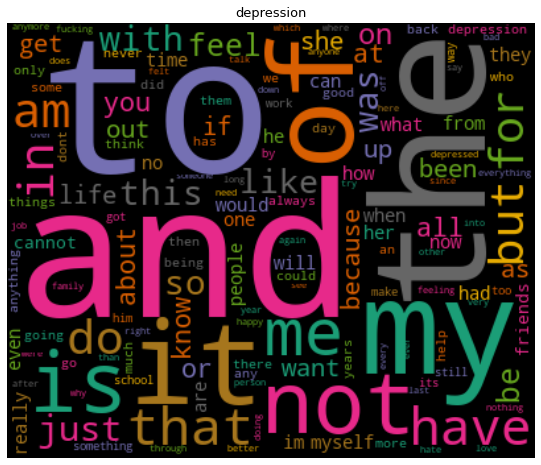

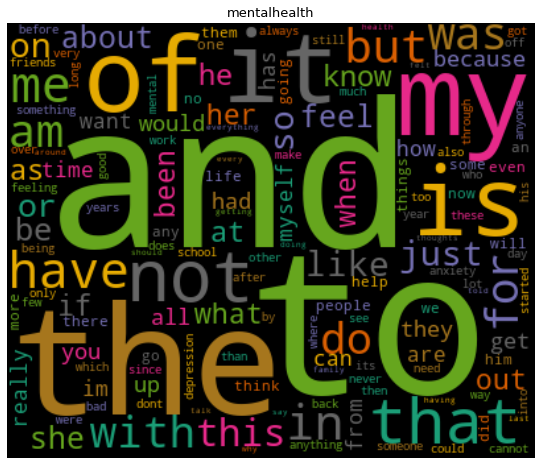

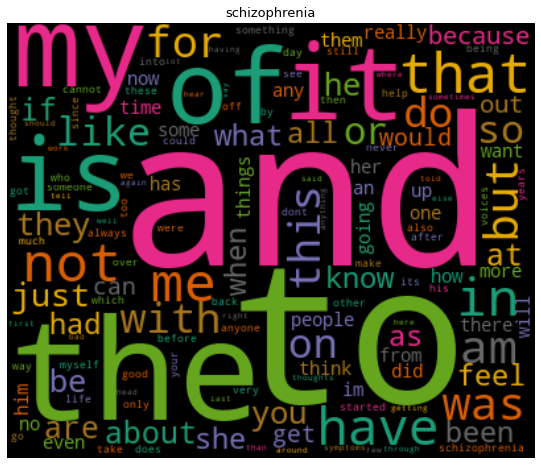

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Training and Getting Predictions

In [51]:
path = "/content/drive/MyDrive/My Folders/NLP_Research/Mental-health-related-subreddits-cleaned.csv"
df = pd.read_csv(path)
df = df[['Title','Text','Subreddit']]
df = df.drop_duplicates(keep = 'last')
df = df.dropna()
df.isnull().sum()
df.head()

,Title,Text,Subreddit
0,exposure does not work!,i have struggled with social anxiety from chil...,Anxiety
1,Panic attack? derealization? can't go to docto...,back in march i know a while ago d i woke up t...,Anxiety
2,How long can a panic attack last?!,i have been withdrawing from medicines lately ...,Anxiety
3,Stepping stones,first time poster long time lurker i have had ...,Anxiety
4,"Coping with anxiety over climate change, on th...",hi alli made a throwaway account as my main ac...,Anxiety


In [52]:
df[['Text','Subreddit']].groupby('Subreddit').count()

,Text
Subreddit,
Anxiety,86080
BPD,38120
autism,7129
bipolar,41023
depression,258019
mentalhealth,39261
schizophrenia,17472


In [53]:
counter = df.copy()
counter['number_of_words'] = counter.Text.apply(lambda x: len(x.split()))
counter = counter.sort_values(by = 'number_of_words',ascending = True)
counter.head(10)

,Title,Text,Subreddit,number_of_words
314208,"Sorry, I Am In Pain",...,depression,0
33471,fuck morning anxiety!!!!!!!,arghhhhhh,Anxiety,1
166806,"""Atleast I'm safe inside my mind""",ha,depression,1
124834,Am I being neglected by my mom?,deleted,depression,1
357871,Can Artificial Intelligence Detect Depression ...,httpswwwsmithsonianmagcominnovationcanartifici...,depression,1
395236,Mental health aide/transitions,httpwwwreintegrationcomresources,mentalhealth,1
315989,I want to die,removed,depression,1
301022,My brain feels like that episode of SpongeBob ...,httpsyoutube5qxd5fhgipq,depression,1
315975,Ive drew something :D,httpsimgurcomafyjrxmh,depression,1
395612,"Second opinion, looking for advice",and,mentalhealth,1


In [54]:
df_cleaned = counter.copy()
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=0]
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=1]
df_cleaned = df_cleaned[df_cleaned['number_of_words']!=2]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('http')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('jpg')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('png')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('www')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('img')==False]
df_cleaned = df_cleaned[df_cleaned['Text'].str.contains('gif')==False]

In [55]:
df_cleaned[['Text','Subreddit']].groupby('Subreddit').count()

,Text
Subreddit,
Anxiety,84182
BPD,36781
autism,6293
bipolar,39660
depression,251883
mentalhealth,36277
schizophrenia,16437


In [12]:
train = pd.read_csv('original_train_data.csv')
test = pd.read_csv('original_test_data.csv')
test  = test[test['maslow']!='none']
train = train[train['maslow']!='none']
test  = test[['sentence','maslow']]
train = train[['sentence','maslow']]
df_train = train.copy()
df_test = test.copy()
df_train['maslow'] = train['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])
df_test['maslow'] = test['maslow'].replace(['physiological','love','stability','esteem','spiritual growth'],['basic_needs','basic_needs','basic_needs','advanced_needs','advanced_needs'])

In [13]:
df_test.head()

,sentence,maslow
0,Jamies job requires her to travel a lot.She ha...,advanced_needs
1,Andy was craving some cereal.He picked out som...,basic_needs
2,Karl locked his car.,basic_needs
3,I was bullied in high school.I had one bully i...,basic_needs
4,Kay was at work when a headache started.,basic_needs


In [14]:
df_test.shape[0]

3610

In [15]:
def text_preprocessing(df, column_name):
    column = column_name 
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return(df)
df_train = text_preprocessing(df_train,'sentence')
df_test = text_preprocessing(df_test,'sentence') 

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/14440 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

  0%|          | 0/3610 [00:00<?, ?it/s]

In [16]:
counter = df_train.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_train = counter.copy()
df_train['maslow'] = df_train.maslow.astype('category')

counter = df_test.copy()
counter['number_of_words'] = counter.sentence.apply(lambda x: len(x.split()))
df_test = counter.copy()
df_test['maslow'] = df_test.maslow.astype('category')

print(df_train.maslow.unique())
encoded_dict = {'advanced_needs':0, 'basic_needs':1}
df_train['maslow'] = df_train.maslow.cat.codes
df_test['maslow'] = df_test.maslow.cat.codes
df_train.maslow

['basic_needs', 'advanced_needs']
Categories (2, object): ['advanced_needs', 'basic_needs']


0        1
2        1
3        1
4        1
5        0
        ..
16468    1
16469    1
16471    1
16472    1
16473    0
Name: maslow, Length: 14440, dtype: int8

In [17]:
df_train.number_of_words.max()

67

In [19]:
data_train = df_train
data_test = df_test
print(data_train.shape)
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')
x_train = tokenizer(
    text = data_train.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

x_test = tokenizer(
    text = data_test.sentence.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

(14440, 3)


Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [20]:
x_train

{'input_ids': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[  101,  1143,  6137, ...,     0,     0,     0],
       [  101,  1103,  1266, ...,     0,     0,     0],
       [  101,  3618,  5005, ...,     0,     0,     0],
       ...,
       [  101,  1112,   178, ...,     0,     0,     0],
       [  101,  1139,  1676, ...,     0,     0,     0],
       [  101, 27629,  7777, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(14440, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [21]:
x_test

{'input_ids': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[  101, 17462,  1905, ...,     0,     0,     0],
       [  101,  1105,  1183, ...,     0,     0,     0],
       [  101, 24181, 17670, ...,     0,     0,     0],
       ...,
       [  101, 13962,  1767, ...,     0,     0,     0],
       [  101,   182,  1766, ...,     0,     0,     0],
       [  101,   179, 11806, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3610, 70), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [28]:
max_len = 70 
input_ids = Input(shape = (max_len,), dtype = tf.int32, name = 'input_ids')
input_mask = Input(shape = (max_len,), dtype = tf.int32, name = 'attention_mask') 
embeddings = bert(input_ids, attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(2, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids, input_mask], outputs = y)
model.layers[2].trainable = True

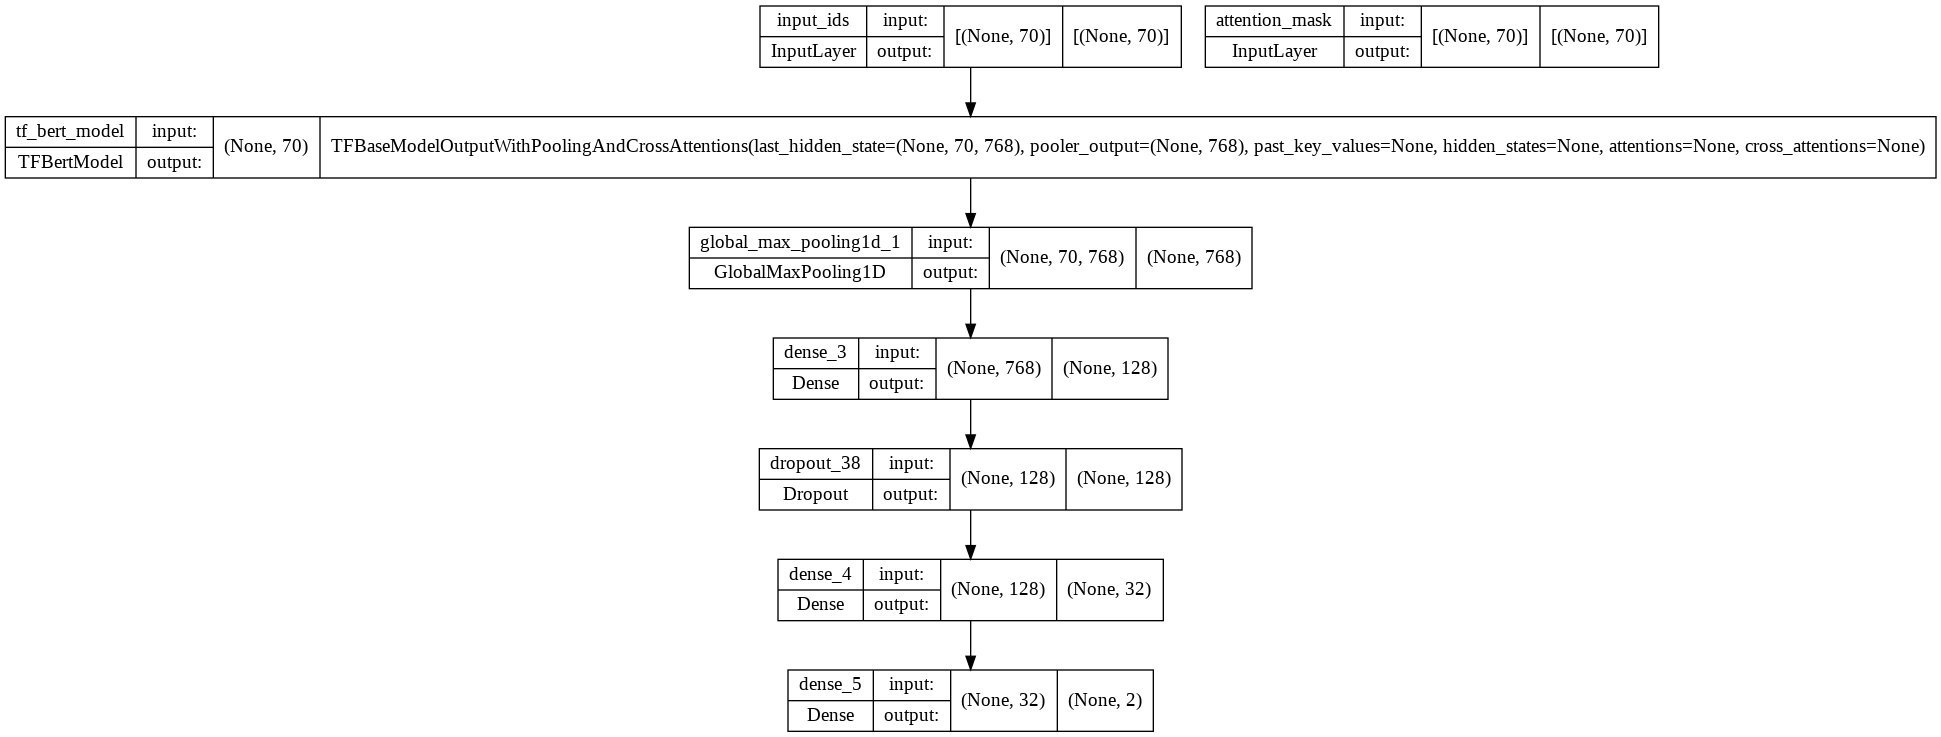

In [29]:
model.layers
tf.keras.utils.plot_model(model, show_shapes = True)

In [30]:
optimizer = Adam(
    learning_rate = 5e-05,
    epsilon = 1e-08,
    decay = 0.01,
    clipnorm = 1.0
)
#loss = CategoricalCrossentropy() 
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer = optimizer, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = metric)

In [31]:
# Model is overfitting too much if included callbacks
for i in range(5):
    answer = int(input("Do you want to run another epoch?1/0: "))
    if answer == 1:
        checkpoint_filepath = '/tmp/checkpoint'
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_filepath,
            save_weights_only=True,
            monitor='val_balanced_accuracy',
            mode='max',
            save_best_only=True)

        callback = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0,
            patience=5,
            verbose=0,
            mode='auto',
            baseline=None,
            restore_best_weights=False,
        )
        train_history = model.fit(x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
                            y = to_categorical(data_train.maslow),
                            validation_data = (
                                {'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}, to_categorical(data_test.maslow)
                            ),
                            epochs = 5,
                            batch_size = 36,
                            callbacks=[model_checkpoint_callback,callback]
                            )
    else:
        break

Do you want to run another epoch?1/0: 1
Epoch 1/5


402/402 [==============================] - 285s 609ms/step - loss: 0.3818 - balanced_accuracy: 0.8319 - val_loss: 0.5474 - val_balanced_accuracy: 0.7532
Epoch 2/5
402/402 [==============================] - 236s 588ms/step - loss: 0.2322 - balanced_accuracy: 0.9060 - val_loss: 0.6939 - val_balanced_accuracy: 0.7382
Epoch 3/5
402/402 [==============================] - 237s 589ms/step - loss: 0.1654 - balanced_accuracy: 0.9383 - val_loss: 0.8431 - val_balanced_accuracy: 0.7280
Epoch 4/5
402/402 [==============================] - 237s 590ms/step - loss: 0.1288 - balanced_accuracy: 0.9506 - val_loss: 0.9741 - val_balanced_accuracy: 0.7280
Epoch 5/5
402/402 [==============================] - 236s 586ms/step - loss: 0.1051 - balanced_accuracy: 0.9630 - val_loss: 1.0109 - val_balanced_accuracy: 0.7330
Do you want to run another epoch?1/0: 0


In [32]:
model.load_weights(checkpoint_filepath)
model.evaluate({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']})

113/113 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - balanced_accuracy: 0.0000e+00


[0.0, 0.0]

In [33]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.28870693, 0.80953336], dtype=float32)

In [34]:
y_predicted = np.argmax(predicted_raw, axis = 1)

In [35]:
from sklearn.metrics import classification_report 
t = ['advanced_needs', 'basic_needs']
print(classification_report(data_test.maslow, y_predicted,target_names = t))

                precision    recall  f1-score   support

advanced_needs       0.75      0.62      0.68      1510
   basic_needs       0.76      0.85      0.80      2100

      accuracy                           0.75      3610
     macro avg       0.75      0.73      0.74      3610
  weighted avg       0.75      0.75      0.75      3610



In [56]:
# Tokenisation takes time on Data to be Predicted due to huge size. Therefore reducing the size of the dataset:
df_an = df_cleaned[df_cleaned['Subreddit'] == 'Anxiety']
df_bp = df_cleaned[df_cleaned['Subreddit'] == 'BPD']
df_au = df_cleaned[df_cleaned['Subreddit'] == 'autism']
df_bi = df_cleaned[df_cleaned['Subreddit'] == 'bipolar']
df_de = df_cleaned[df_cleaned['Subreddit'] == 'depression']
df_men = df_cleaned[df_cleaned['Subreddit'] == 'mentalhealth']
df_sch = df_cleaned[df_cleaned['Subreddit'] == 'schizophrenia']

df_an = df_an.iloc[0:2571][:]
df_bp = df_bp.iloc[0:2571][:]
df_au = df_au.iloc[0:2571][:]
df_bi = df_bi.iloc[0:2571][:]
df_de = df_de.iloc[0:2571][:]
df_men = df_men.iloc[0:2571][:]
df_sch = df_sch.iloc[0:2571][:]
t = pd.concat([df_an,df_bp,df_au,df_bi,df_de,df_men,df_sch], axis = 0)
t = shuffle(t)
t.reset_index(inplace = True)
t = t[['Title','Text','Subreddit']]
t.head()

,Title,Text,Subreddit
0,DAE isolate themselves as a punishment?,i feel like a bad and toxic person because of ...,BPD
1,Ask two of my friends if they wanted to hang o...,need some support right now,depression
2,"I cant cry, i don't feel anything.",my depression has turned into anger and i just...,mentalhealth
3,Haven't felt sad in a couple weeks...,but i also have not felt happy at least not ov...,mentalhealth
4,Is anyone up for a chat?,need help passing through the night,depression


In [57]:
df_cleaned = t.copy()
df_cleaned.head()

,Title,Text,Subreddit
0,DAE isolate themselves as a punishment?,i feel like a bad and toxic person because of ...,BPD
1,Ask two of my friends if they wanted to hang o...,need some support right now,depression
2,"I cant cry, i don't feel anything.",my depression has turned into anger and i just...,mentalhealth
3,Haven't felt sad in a couple weeks...,but i also have not felt happy at least not ov...,mentalhealth
4,Is anyone up for a chat?,need help passing through the night,depression


In [39]:
data_test = df_cleaned
x_test = tokenizer(
    text = data_test.Text.tolist(),
    add_special_tokens = True,
    max_length = 70,
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_token_type_ids = False,
    return_attention_mask = True, 
    verbose = True
)

In [40]:
predicted_raw = model.predict({'input_ids': x_test['input_ids'], 'attention_mask': x_test['attention_mask']}) 
predicted_raw[0]

array([0.27058294, 0.7398722 ], dtype=float32)

In [41]:
predicted_raw[0][0]

0.27058294

In [43]:
predicted_raw.shape

(17997, 2)

In [58]:
category = ['basic_needs','advanced_needs']

In [59]:
for i in category:
    df_cleaned[i] = 0

lis_basic_needs = []
lis_advanced_needs = []

for i in range(len(predicted_raw)):
    lis_basic_needs.append(predicted_raw[i][0])
    lis_advanced_needs.append(predicted_raw[i][1])

df_cleaned['basic_needs'] = lis_basic_needs
df_cleaned['advanced_needs'] = lis_advanced_needs
df_cleaned.head()

,Title,Text,Subreddit,basic_needs,advanced_needs
0,DAE isolate themselves as a punishment?,i feel like a bad and toxic person because of ...,BPD,0.270583,0.739872
1,Ask two of my friends if they wanted to hang o...,need some support right now,depression,0.170180,0.840166
2,"I cant cry, i don't feel anything.",my depression has turned into anger and i just...,mentalhealth,0.423771,0.243874
3,Haven't felt sad in a couple weeks...,but i also have not felt happy at least not ov...,mentalhealth,0.339149,0.594220
4,Is anyone up for a chat?,need help passing through the night,depression,0.760541,0.025134


In [62]:
y_predicted = np.argmax(predicted_raw, axis = 1)
df_cleaned['final_prediction'] = y_predicted
df_cleaned['final_prediction'] = df_cleaned['final_prediction'].replace([1,0],['advanced_needs','basic_needs'])
df_cleaned.head()

,Title,Text,Subreddit,basic_needs,advanced_needs,final_prediction
0,DAE isolate themselves as a punishment?,i feel like a bad and toxic person because of ...,BPD,0.270583,0.739872,advanced_needs
1,Ask two of my friends if they wanted to hang o...,need some support right now,depression,0.170180,0.840166,advanced_needs
2,"I cant cry, i don't feel anything.",my depression has turned into anger and i just...,mentalhealth,0.423771,0.243874,basic_needs
3,Haven't felt sad in a couple weeks...,but i also have not felt happy at least not ov...,mentalhealth,0.339149,0.594220,advanced_needs
4,Is anyone up for a chat?,need help passing through the night,depression,0.760541,0.025134,basic_needs


In [67]:
df_cleaned[['Text','final_prediction']].groupby(['final_prediction']).count()

,Text
final_prediction,
advanced_needs,10112
basic_needs,7885


In [66]:
df_cleaned[['Text','Subreddit','final_prediction']].groupby(['Subreddit','final_prediction']).count()

Text
Subreddit     final_prediction      
Anxiety       advanced_needs    1449
              basic_needs       1122
BPD           advanced_needs    1453
              basic_needs       1118
autism        advanced_needs    1467
              basic_needs       1104
bipolar       advanced_needs    1418
              basic_needs       1153
depression    advanced_needs    1435
              basic_needs       1136
mentalhealth  advanced_needs    1471
              basic_needs       1100
schizophrenia advanced_needs    1419
              basic_needs       1152

In [81]:
def get_predictions(df_cleaned,subreddit_type,final_prediction):
    g = df_cleaned[df_cleaned['Subreddit'] == subreddit_type]
    g = g[g['final_prediction'] == final_prediction]
    for i in range(0,10):
        print(g.iloc[i][1]) 

print("Advanced Needs:")
get_predictions(df_cleaned,'depression','advanced_needs')
print("---------------------------------------------------------------------------------------------")
print("Basic Needs:")
get_predictions(df_cleaned,'depression','basic_needs')

Advanced Needs:
need some support right now
im gonna fail my classes
damniti need help
yep that is it
help i just cant
i cannot handle this
makes me want to keep trying
i often think about this
my edge level is high today
i just dont think anymore
---------------------------------------------------------------------------------------------
Basic Needs:
need help passing through the night
might be last day
whats your reason
i am tired
does anyone else11one1eleven111
nowadays that seems like bitter torture
is it worth to live
safeguard me from yourselves
you know like without committing suicide
just depressed and unmotivated


In [82]:
print("Advanced Needs:")
get_predictions(df_cleaned,'Anxiety','advanced_needs')
print("---------------------------------------------------------------------------------------------")
print("Basic Needs:")
get_predictions(df_cleaned,'Anxiety','basic_needs')

Advanced Needs:
it seems fun can a normal person have it or is just genetic
why does it happen so annoying
never make the decisions your anxiety tells you to make wait for a moment of clarity to decide
how has it affected your anxiety would you consider going off of it
story of my life
has it helped you greatly what was the time frame other things you did to supplement healing thanks
what time of day do you think it is the best time to take it
why i have a perfectionist complex nor do i understand why i do this to myself
help me make it through the night
has anyone experienced this during a panic attack
---------------------------------------------------------------------------------------------
Basic Needs:
pretty much what the title says
justi do not know
im 20m from sweden and it would be so cool to find another person my ageish
some please prime minister mehelp
i just dont know what to do anymore
like my body is the alarm clock would not let me not forget
feeling all of the above r

In [84]:
print("Advanced Needs:")
get_predictions(df_cleaned,'mentalhealth','advanced_needs')
print("---------------------------------------------------------------------------------------------")
print("Basic Needs:")
get_predictions(df_cleaned,'mentalhealth','basic_needs')

Advanced Needs:
but i also have not felt happy at least not over anything i can recalleh whatever i will just keep thinking it is normal how much worse can it really get
how to recover after giving emotional sharing that youre alryt and then you flipped out
i am 6 feet and 144 pounds and i love it skinny cool whos with me
making new vids
i honestly dont feel much i just kind of blink and blankly stare it doesnt hit me very hard
i cannot get medication due to health risk what are steps to take from here
stuck in this rotten housex200b
has anyone received shock therapy for what mental illnessdid it help was it worth it
how did you know you were bipolar what were your first signs did you have a psychotic episode
i am reading up on this theory at the moment i just wanted to get peoples defintionsopinions and interpretation of this theory
---------------------------------------------------------------------------------------------
Basic Needs:
my depression has turned into anger and i just 

In [85]:
print("Advanced Needs:")
get_predictions(df_cleaned,'autism','advanced_needs')
print("---------------------------------------------------------------------------------------------")
print("Basic Needs:")
get_predictions(df_cleaned,'autism','basic_needs')

Advanced Needs:
i was told that if you have autism you cannot be also diagnosed with a personality disorder is this true i cannot find much online about this i was diagnosed with asd a year ago i really think i have bpd and avpd i have actually thought that for about 5 years i have an appointment with a therapist next week but i am wondering if anyone here knows anything about this
hey allwe plan to be moving to chicago soon for a new job and we were wondering if there was an easy list or a good starting point to specifically look for autism resources in the chicagoland area we have a 5 yearold diagnosed on the spectrum and would like to contact people and setup therapy for when we plan to movethanks in advance
my brother has issues with trusting strangers and giving out personal information he cant tell what peoples intentions are and he talks alot to strangers online he also cant tell when people are making fun of him i feel bad i know how difficult it was to be 16 my parents told hi

In [86]:
df_cleaned.head()

,Title,Text,Subreddit,basic_needs,advanced_needs,final_prediction
0,DAE isolate themselves as a punishment?,i feel like a bad and toxic person because of ...,BPD,0.270583,0.739872,advanced_needs
1,Ask two of my friends if they wanted to hang o...,need some support right now,depression,0.170180,0.840166,advanced_needs
2,"I cant cry, i don't feel anything.",my depression has turned into anger and i just...,mentalhealth,0.423771,0.243874,basic_needs
3,Haven't felt sad in a couple weeks...,but i also have not felt happy at least not ov...,mentalhealth,0.339149,0.594220,advanced_needs
4,Is anyone up for a chat?,need help passing through the night,depression,0.760541,0.025134,basic_needs


In [87]:
from google.colab import files

df_cleaned.to_csv('reddit_predictions.csv')
files.download('reddit_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>